In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
#Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs= zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

22.74556008002257 75.678349365585
9.875131410728727 47.65368714364246
-56.28943880288616 -126.52629849340872
-14.454046318394049 -154.15938041894805
9.148464057288535 24.645380179179767
74.77470131569433 -56.40043347947322
67.83710628499375 114.5177087178858
63.92300043563509 20.492305709633484
80.84455315491755 -155.80746911421522
-80.25732397536919 169.82191453434177
3.922968578459134 -12.860043425358072
35.477613178382114 34.22157298163438
8.24680357600188 105.77648617548232
49.175953140177654 87.22859243108155
10.105106064959145 -37.79629533953195
-19.31423320453392 -68.9467832819742
7.318438166563908 -41.98713888428813
-76.66860282163803 164.1125020661696
82.66090744324671 63.714338783493986
88.00597375453577 -143.68575154500292
-63.87186730766133 100.34279363950782
17.076469739255316 -30.936432776749513
-17.478875557139247 170.3298123202385
-34.21775807060979 -163.9858805591548
57.98281057606252 16.77612973399826
-54.4255356678128 -29.39979688999543
48.25906330749302 -21.68825064

-42.083860632782034 -119.15241283008989
-79.25264669297114 130.87802611741995
11.163533196222346 -131.74776367337813
24.343193668749876 -148.61523871785965
-1.7978799185993068 165.58626862059697
54.05924949803381 98.60598399189996
-3.0947730893856686 -120.89797584148691
-44.74680841267064 6.301942025311064
88.87214263248902 150.95276703167025
-9.547322274803022 -9.661171243797128
39.942690547258536 149.97299725741044
62.801092000334876 -132.5268856425356
-38.62945180038435 -35.62508620644516
-87.07623639590784 89.49710127862357
18.43347945955432 95.59743718614425
63.277881447760336 -0.15332092882866277
-38.88568283667945 176.17847894717193
5.75242613432178 -176.68972839061027
45.39799713659903 -9.800969834858648
-24.902571912475025 -139.04829192600346
0.4918406062767673 -67.88116002933077
-67.61112254931608 133.8850823795254
-88.28066256384699 29.26801241299924
61.30051443560569 -175.10267656024115
-30.99886841524905 5.4927618737486625
-9.594748606951015 139.9832213089524
-44.628211869

In [5]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city= citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
#Import requests and weather_api_key
import requests
from config import weather_api_key

#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key

In [7]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in the list.
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes. 
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    #Add 1 to the record count.
    record_count += 1
    
#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the dat to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
# #Loop through all the cities in our list:
# for i in range(len(cities)):
#     #Group cities in sets of 50 for logging purposes.
#     if(i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)
        
#     #create endpoint url with each city
#     city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hatod
Processing Record 2 of Set 1 | garowe
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | raga
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | udachnyy
Processing Record 8 of Set 1 | umea
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | monrovia
Processing Record 12 of Set 1 | ziyamet
City not found. Skipping...
Processing Record 13 of Set 1 | bac lieu
Processing Record 14 of Set 1 | aktash
Processing Record 15 of Set 1 | itarema
Processing Record 16 of Set 1 | iquique
Processing Record 17 of Set 1 | carutapera
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | vila
Processing Record 22 of Set 1 | avarua
Processing Recor

Processing Record 40 of Set 4 | pontianak
Processing Record 41 of Set 4 | sorland
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | westport
Processing Record 44 of Set 4 | lanigan
Processing Record 45 of Set 4 | bathurst
Processing Record 46 of Set 4 | manggar
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | langham
Processing Record 49 of Set 4 | gat
Processing Record 50 of Set 4 | rio gallegos
Processing Record 1 of Set 5 | medina
Processing Record 2 of Set 5 | la paz
Processing Record 3 of Set 5 | yangambi
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | ahuimanu
Processing Record 6 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 7 of Set 5 | pandan
Processing Record 8 of Set 5 | nishihara
Processing Record 9 of Set 5 | khirkiya
Processing Record 10 of Set 5 | hithadhoo
Processing Record 11 of Set 5 | ancud
Processing Record 12 of Set 5 | cabedelo
Proces

Processing Record 29 of Set 8 | alofi
Processing Record 30 of Set 8 | barentu
Processing Record 31 of Set 8 | agadez
Processing Record 32 of Set 8 | bismarck
Processing Record 33 of Set 8 | lodja
Processing Record 34 of Set 8 | lolua
City not found. Skipping...
Processing Record 35 of Set 8 | esqueda
Processing Record 36 of Set 8 | saleaula
City not found. Skipping...
Processing Record 37 of Set 8 | marsa matruh
Processing Record 38 of Set 8 | sivas
Processing Record 39 of Set 8 | angoche
Processing Record 40 of Set 8 | deer lake
Processing Record 41 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 42 of Set 8 | pacific grove
Processing Record 43 of Set 8 | satitoa
City not found. Skipping...
Processing Record 44 of Set 8 | talnakh
Processing Record 45 of Set 8 | honningsvag
Processing Record 46 of Set 8 | bull savanna
Processing Record 47 of Set 8 | puri
Processing Record 48 of Set 8 | tura
Processing Record 49 of Set 8 | mudanya
Processing Record 50 of Set 8 | yelan


Processing Record 16 of Set 12 | mayo
Processing Record 17 of Set 12 | elko
Processing Record 18 of Set 12 | harlingen
Processing Record 19 of Set 12 | montepuez
Processing Record 20 of Set 12 | bubaque
Processing Record 21 of Set 12 | fairbanks
Processing Record 22 of Set 12 | barbar
City not found. Skipping...
Processing Record 23 of Set 12 | bentong
Processing Record 24 of Set 12 | inuvik
Processing Record 25 of Set 12 | yinchuan
Processing Record 26 of Set 12 | weinan
Processing Record 27 of Set 12 | phon
Processing Record 28 of Set 12 | maceio
Processing Record 29 of Set 12 | carnarvon
Processing Record 30 of Set 12 | erzin
Processing Record 31 of Set 12 | hofn
Processing Record 32 of Set 12 | san jose
Processing Record 33 of Set 12 | riviere-au-renard
Processing Record 34 of Set 12 | port moresby
Processing Record 35 of Set 12 | knysna
Processing Record 36 of Set 12 | barao de melgaco
Processing Record 37 of Set 12 | itupiranga
Processing Record 38 of Set 12 | atikokan
Processing

In [8]:
len(city_data)

581

In [10]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hatod,22.8000,75.7333,75.52,88,40,4.61,IN,2022-07-21 18:57:22
1,Garowe,8.4054,48.4845,82.27,38,78,15.50,SO,2022-07-21 18:57:23
2,Rikitea,-23.1203,-134.9692,74.71,77,74,19.04,PF,2022-07-21 18:55:32
3,Faanui,-16.4833,-151.7500,77.50,73,9,12.73,PF,2022-07-21 18:57:23
4,Raga,8.4596,25.6780,69.94,96,100,3.24,SS,2022-07-21 18:57:24
5,Upernavik,72.7868,-56.1549,47.03,87,100,10.78,GL,2022-07-21 18:57:24
6,Udachnyy,66.4167,112.4000,48.45,100,100,1.34,RU,2022-07-21 18:57:24
7,Umea,63.8284,20.2597,66.13,88,0,3.44,SE,2022-07-21 18:52:28
8,Barrow,71.2906,-156.7887,34.77,90,91,24.27,US,2022-07-21 18:55:36
9,Bluff,-46.6000,168.3333,45.25,84,76,9.82,NZ,2022-07-21 18:53:03


In [11]:
new_column_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hatod,IN,2022-07-21 18:57:22,22.8000,75.7333,75.52,88,40,4.61
1,Garowe,SO,2022-07-21 18:57:23,8.4054,48.4845,82.27,38,78,15.50
2,Rikitea,PF,2022-07-21 18:55:32,-23.1203,-134.9692,74.71,77,74,19.04
3,Faanui,PF,2022-07-21 18:57:23,-16.4833,-151.7500,77.50,73,9,12.73
4,Raga,SS,2022-07-21 18:57:24,8.4596,25.6780,69.94,96,100,3.24
5,Upernavik,GL,2022-07-21 18:57:24,72.7868,-56.1549,47.03,87,100,10.78
6,Udachnyy,RU,2022-07-21 18:57:24,66.4167,112.4000,48.45,100,100,1.34
7,Umea,SE,2022-07-21 18:52:28,63.8284,20.2597,66.13,88,0,3.44
8,Barrow,US,2022-07-21 18:55:36,71.2906,-156.7887,34.77,90,91,24.27
9,Bluff,NZ,2022-07-21 18:53:03,-46.6000,168.3333,45.25,84,76,9.82


In [12]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

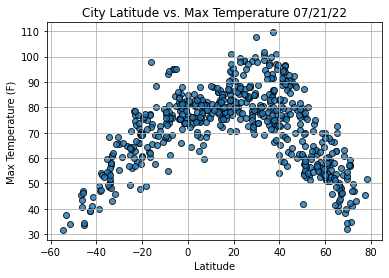

In [16]:
#Import the time module.
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities"
           )

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show Plot
plt.show()

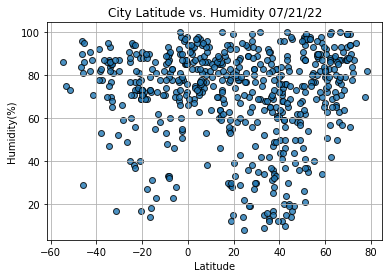

In [17]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities"
           )

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

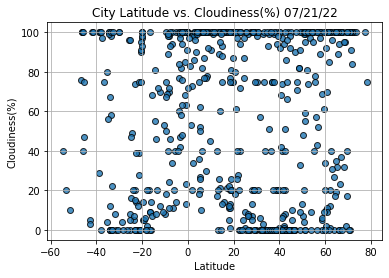

In [18]:
#Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities"
           )

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

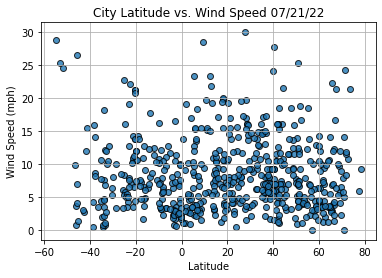

In [19]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities"
           )

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()